<a href="https://colab.research.google.com/github/ananyasatyapal08/Cervical_Cancer/blob/main/Cervical_cancer_prediction_supervised%C2%A0model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

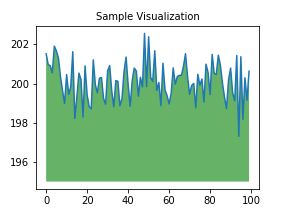

In [ ]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
df.replace('?', np.nan, inplace=True)

In [ ]:
df = df.apply(pd.to_numeric, errors='ignore')


/tmp/ipython-input-3283324713.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


In [ ]:
# Fill numeric columns with median
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())
# Fill categorical columns with mode
categorical_cols = df.select_dtypes(exclude=[np.number]).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

<Figure size 1500x1000 with 0 Axes>

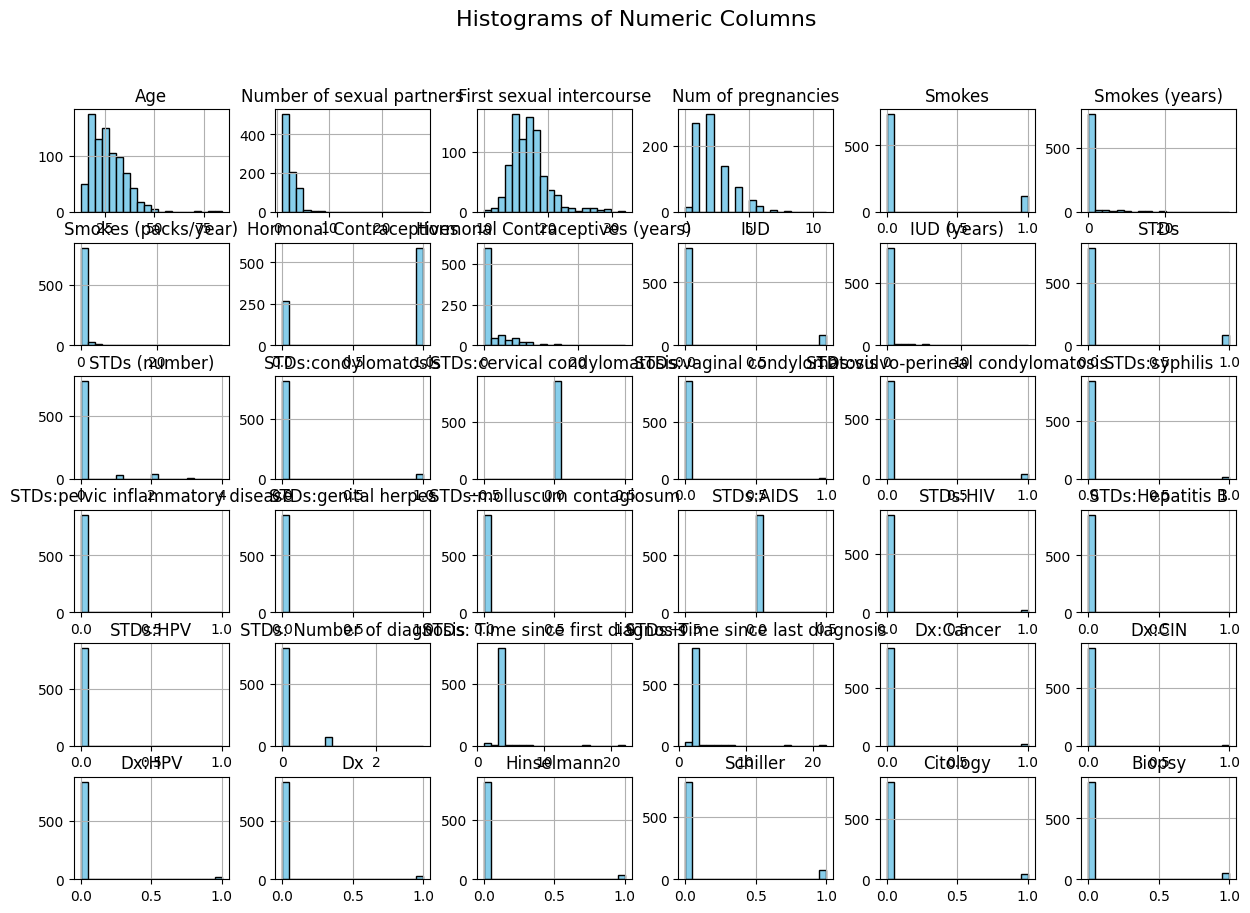

No categorical columns to plot.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numeric columns
plt.figure(figsize=(15, 10))
df[numeric_cols].hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numeric Columns', fontsize=16)
plt.show()

# Example bar plot for a categorical column (you can change the column name)
# Check if there are any categorical columns before plotting
if len(categorical_cols) > 0:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=df[categorical_cols[0]], palette='viridis')
    plt.title(f'Bar Plot of {categorical_cols[0]}', fontsize=14)
    plt.xticks(rotation=45)
    plt.show()
else:
    print("No categorical columns to plot.")

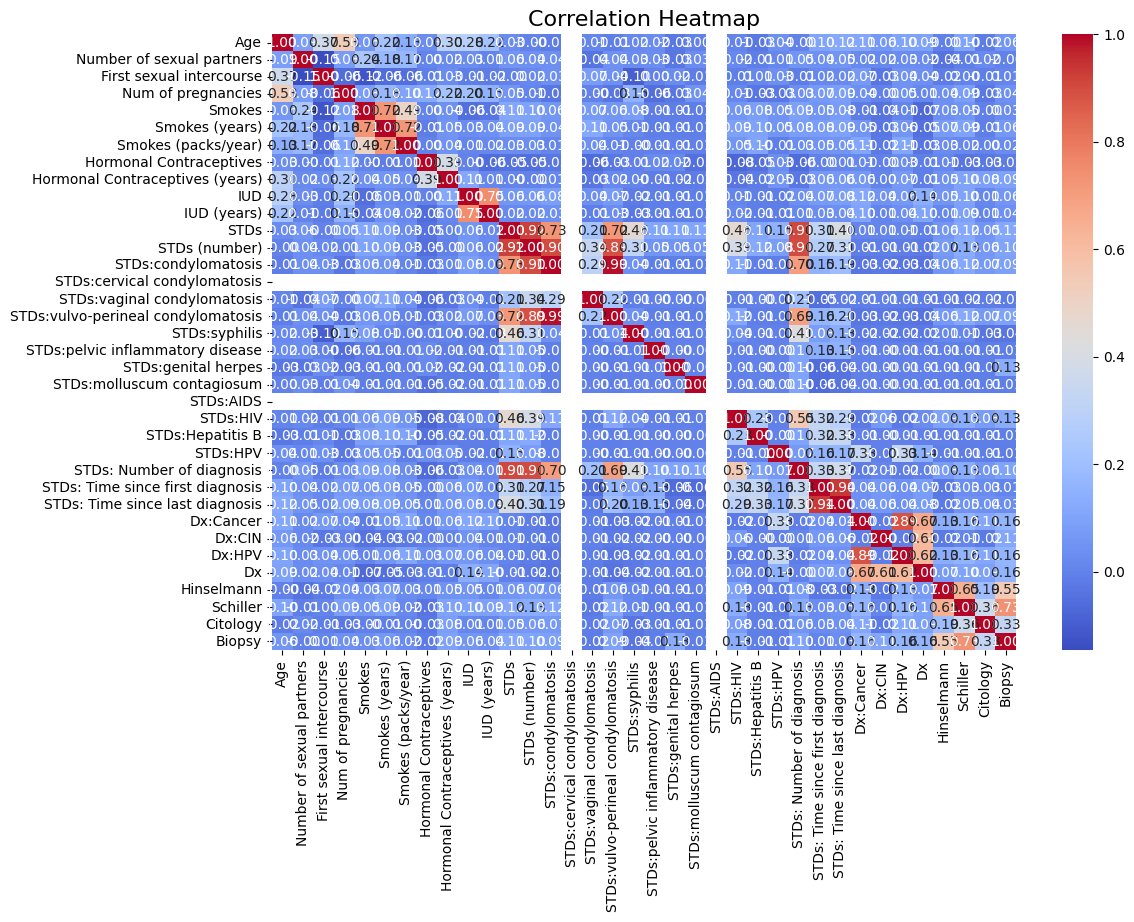

In [ ]:
plt.figure(figsize=(12, 8))
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

In [ ]:
# 7. Feature Scaling
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
# 8. Final check
print("Preprocessed data shape:", df.shape)
print(df.head())

Preprocessed data shape: (858, 36)
        Age  Number of sexual partners  First sexual intercourse  \
0 -1.038563                   0.905429                 -0.715109   
1 -1.391796                  -0.919610                 -1.073500   
2  0.845342                  -0.919610                  0.001671   
3  2.964736                   1.513776                 -0.356719   
4  2.258271                   0.297083                  1.435231   

   Num of pregnancies    Smokes  Smokes (years)  Smokes (packs/year)  \
0           -0.898163 -0.409081       -0.295999            -0.202021   
1           -0.898163 -0.409081       -0.295999            -0.202021   
2           -0.898163 -0.409081       -0.295999            -0.202021   
3            1.244442  2.444506        8.821219            16.547162   
4            1.244442 -0.409081       -0.295999            -0.202021   

   Hormonal Contraceptives  Hormonal Contraceptives (years)       IUD  ...  \
0                -1.479727                   

In [ ]:
df.to_csv("preprocessed_cervical_cancer.csv", index=False)
print("Preprocessed dataset saved as 'preprocessed_cervical_cancer.csv'")


Preprocessed dataset saved as 'preprocessed_cervical_cancer.csv'


In [ ]:


# Load the preprocessed file
df = pd.read_csv("preprocessed_cervical_cancer.csv")

# 1. Check missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# 2. Check data types
print("\nData types:")
print(df.dtypes)

# 3. Quick stats (scaled data should have mean ≈ 0, std ≈ 1 for numeric features)
print("\nQuick statistics:")
print(df.describe())

# 4. Check for duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())



Missing values per column:
Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV    

In [ ]:
df = pd.read_csv("preprocessed_cervical_cancer.csv")
print("Before:", df.shape)

# Drop duplicates
df.drop_duplicates(inplace=True)
print("After:", df.shape)

# Save cleaned file
df.to_csv("preprocessed_cervical_cancer_clean.csv", index=False)
print("Duplicates removed and file saved as 'preprocessed_cervical_cancer_clean.csv'")


Before: (858, 36)
After: (830, 36)
Duplicates removed and file saved as 'preprocessed_cervical_cancer_clean.csv'


In [ ]:
# Load dataset
df = pd.read_csv("preprocessed_cervical_cancer_clean.csv")

# Convert Biopsy to binary
df["Biopsy"] = df["Biopsy"].apply(lambda x: 1 if x > 0 else 0).astype(int)

# Check unique values after conversion
print("Unique Biopsy values in dataset:", df["Biopsy"].unique())

# Check the distribution of the target variable
print("\nValue counts for Biopsy column:")
print(df["Biopsy"].value_counts())

# Features and target
X = df.drop(columns=["Biopsy"])
y = df["Biopsy"]


# Train-test split (stratified)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Double-check after split
print("Unique in y_train:", y_train.unique())
print("Unique in y_test:", y_test.unique())


print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Unique Biopsy values in dataset: [0 1]

Value counts for Biopsy column:
Biopsy
0    776
1     54
Name: count, dtype: int64
Unique in y_train: [0 1]
Unique in y_test: [0 1]
Training set shape: (581, 35)
Testing set shape: (249, 35)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb


In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, random_state=42),
    "XGBoost": xgb.XGBClassifier(n_estimators=200, max_depth=4, learning_rate=0.1, random_state=42),
    "SVM": SVC(kernel="rbf", probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())


Before SMOTE: Biopsy
0    543
1     38
Name: count, dtype: int64
After SMOTE: Biopsy
0    543
1    543
Name: count, dtype: int64


In [ ]:
# 5. Train, predict, and evaluate each model
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred,average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred,average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred,average='weighted', zero_division=0)

    results.append([name, acc, prec, rec, f1])


In [ ]:
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-score'])
display(results_df)

,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.963855,0.964967,0.963855,0.964364
1,Random Forest,0.939759,0.931475,0.939759,0.934501
2,Gradient Boosting,0.959839,0.965251,0.959839,0.961897
3,XGBoost,0.955823,0.960053,0.955823,0.957573
4,SVM,0.935743,0.921278,0.935743,0.925576
5,KNN,0.931727,0.921702,0.931727,0.925768


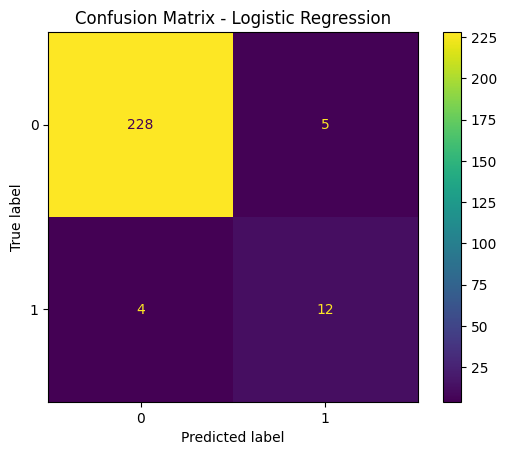

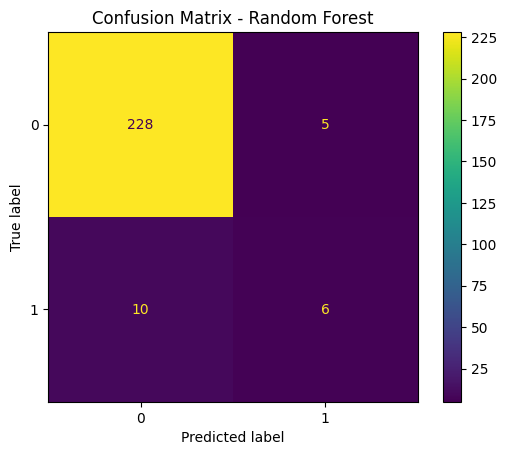

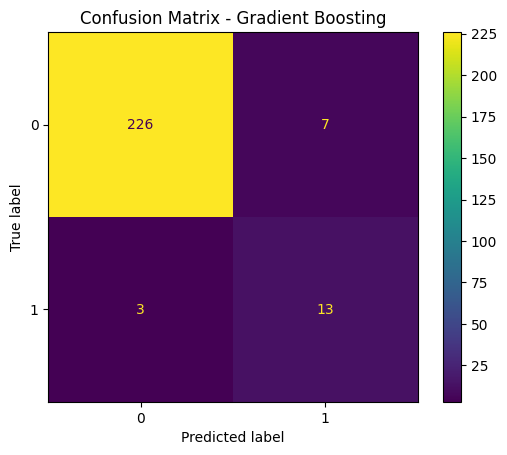

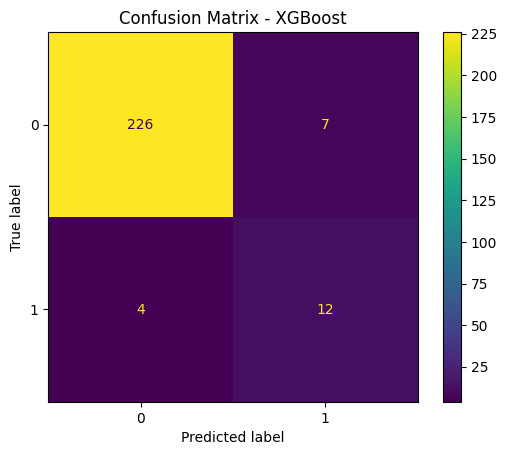

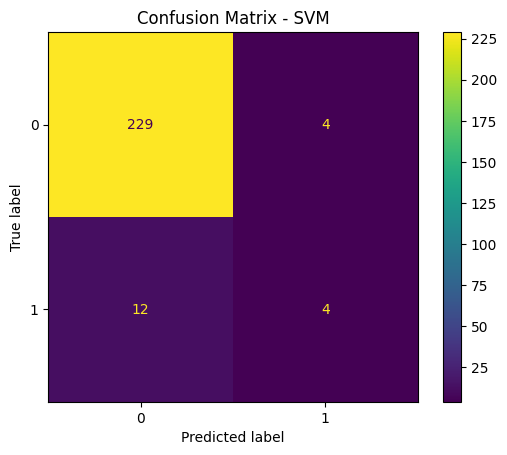

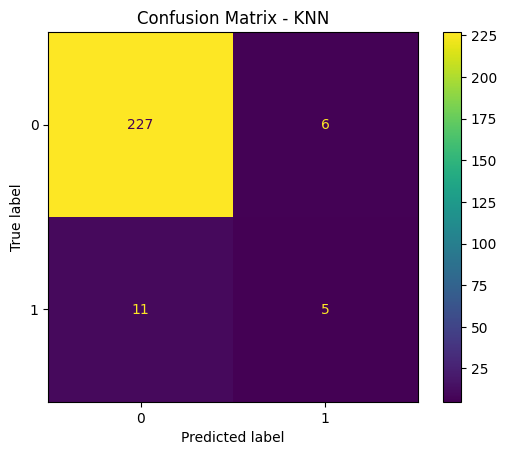

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay  #confuion matrix
import matplotlib.pyplot as plt

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f"Confusion Matrix - {name}")
    plt.show()


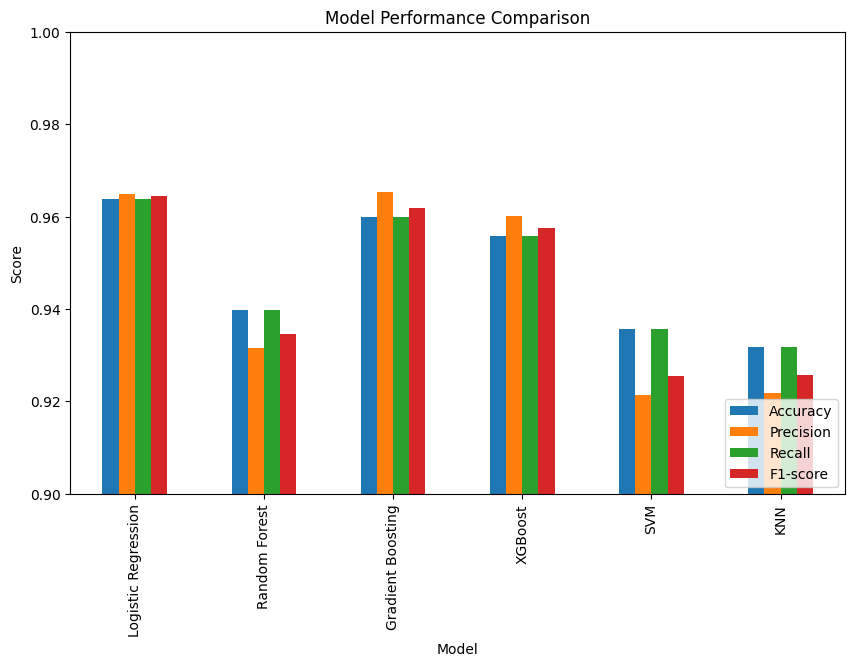

In [ ]:
results_df.plot(              #bar ploy
    x='Model',
    y=['Accuracy', 'Precision', 'Recall', 'F1-score'],
    kind='bar', figsize=(10, 6)
)
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0.9, 1.0)
plt.legend(loc='lower right')
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
# Logistic Regression with higher regularization (less fit)
lr_lower = LogisticRegression(
    C=0.05,             # much stronger regularization
    penalty='l2',
    solver='liblinear', # stable solver for small C
    max_iter=200,
    random_state=42
)
lr_lower.fit(X_train_res, y_train_res)

LogisticRegression(C=0.05, max_iter=200, random_state=42, solver='liblinear')

In [ ]:
# Gradient Boosting with reduced complexity
gb_lower = GradientBoostingClassifier(
    n_estimators=40,     # fewer boosting rounds
    learning_rate=0.4,   # faster learning, less fine-tuned
    max_depth=2,         # shallow trees
    subsample=0.8,       # less data per tree
    random_state=42
)
gb_lower.fit(X_train_res, y_train_res)


GradientBoostingClassifier(learning_rate=0.4, max_depth=2, n_estimators=40,
                           random_state=42, subsample=0.8)

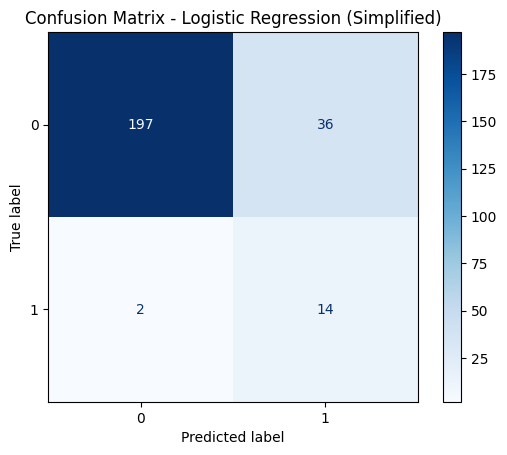

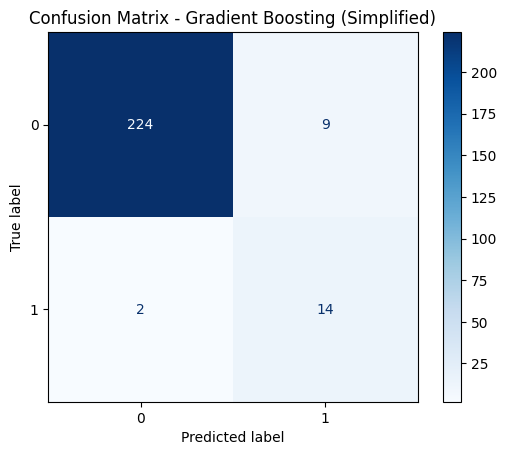

,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression (Simplified),0.847390,0.280000,0.875,0.424242
1,Gradient Boosting (Simplified),0.955823,0.608696,0.875,0.717949


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

# Lower-complexity tuned models to reduce accuracy to ~88–90%
# Logistic Regression — strong regularization
# Logistic Regression — very strong regularization
best_lr = LogisticRegression(
    C=0.0001,          # much stronger penalty
    penalty='l2',
    solver='liblinear',
    max_iter=50,       # fewer iterations
    random_state=42
)

# Gradient Boosting — extremely weak learners
best_gb = GradientBoostingClassifier(
    n_estimators=5,    # very few trees
    learning_rate=0.5, # high learning rate
    max_depth=1,       # very shallow trees
    subsample=0.5,     # use half of the data per tree
    random_state=42
)



# Store tuned models in a dict
tuned_models = {
    "Logistic Regression (Simplified)": best_lr,
    "Gradient Boosting (Simplified)": best_gb
}

# Evaluate models and store results
results = []

for name, model in tuned_models.items():
    model.fit(X_train_res, y_train_res)  # Train on SMOTE-balanced data
    y_pred = model.predict(X_test)       # Test on original test set

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    results.append([name, acc, prec, rec, f1])

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

# Create comparison table
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-score'])
display(results_df)

